In [71]:
import pandas as pd
import numpy as np
data = pd.read_csv("./data/train.csv")
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### Data Set Description
Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond.

In [45]:
data['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [46]:
data['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [47]:
data['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [48]:
data.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
145940,145940,0.41,Ideal,G,VVS1,62.6,53.0,4.78,4.80,2.99,1043
3279,3279,0.31,Ideal,F,IF,62.0,54.0,4.36,4.34,2.70,863
114055,114055,0.93,Ideal,G,SI2,62.7,55.0,6.25,6.21,3.90,3885
87615,87615,1.01,Ideal,E,SI2,61.8,57.0,6.43,6.46,3.98,4274
71090,71090,1.01,Premium,H,SI2,61.7,58.0,6.44,6.40,3.97,4150
168881,168881,0.74,Ideal,E,VS2,61.9,55.0,5.85,5.84,3.62,3379
161660,161660,1.00,Good,E,SI2,62.7,56.0,6.28,6.34,3.96,4620
54677,54677,1.20,Good,G,SI2,63.5,57.3,6.77,6.72,4.27,5105
76156,76156,2.04,Premium,J,SI1,59.4,58.0,8.38,8.32,4.94,12998
153518,153518,1.52,Premium,G,VS1,60.8,60.0,7.37,7.42,4.50,14192


In [49]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [50]:
data.shape

(193573, 11)

In [51]:
data.size

2129303

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [53]:
data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [54]:
data.drop(labels=['id'], axis=1, inplace=True)

In [55]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [56]:
data.duplicated().sum()

0

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [58]:
cat_columns = data.columns[data.dtypes == 'object']

In [59]:
num_columns = data.columns[data.dtypes != 'object']

In [60]:
data[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   carat   193573 non-null  float64
 1   depth   193573 non-null  float64
 2   table   193573 non-null  float64
 3   x       193573 non-null  float64
 4   y       193573 non-null  float64
 5   z       193573 non-null  float64
 6   price   193573 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 10.3 MB


In [61]:
data[cat_columns].head()

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2


In [62]:
data[num_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [63]:
for col in cat_columns:
    print(data[col].value_counts())
    print(f"{len(data[col].value_counts())} unique values in {col}")
    print(20*"#")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
5 unique values in cut
####################
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
7 unique values in color
####################
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
8 unique values in clarity
####################


####################


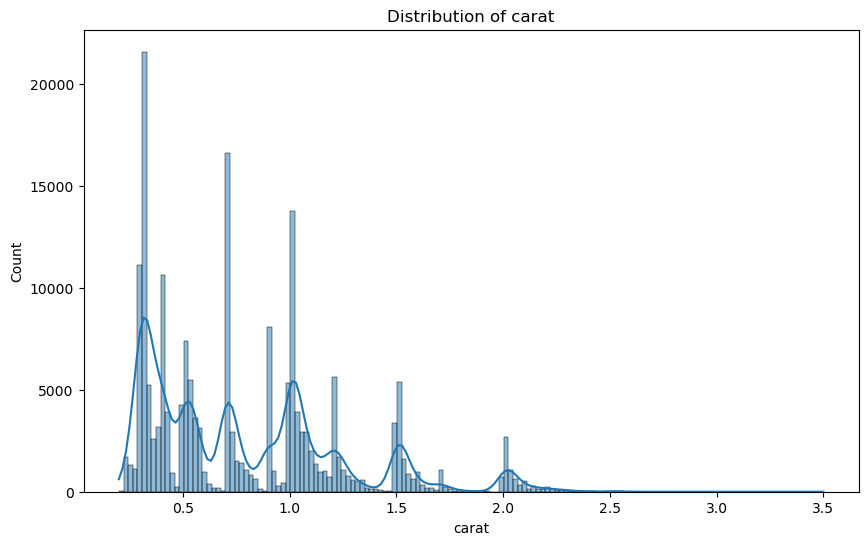

####################


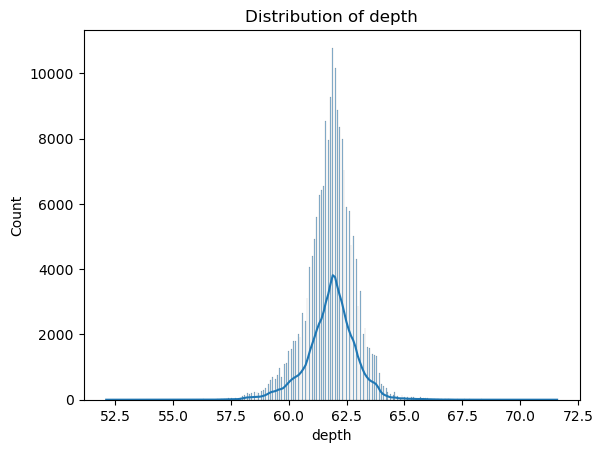

####################


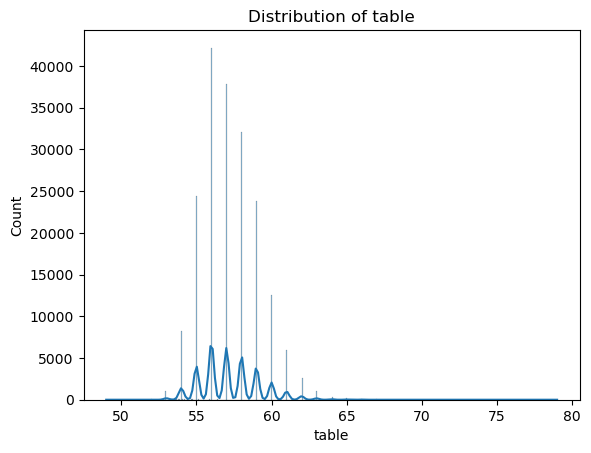

####################


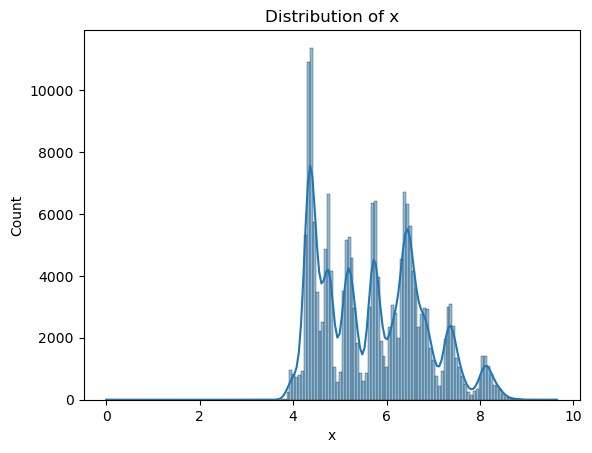

####################


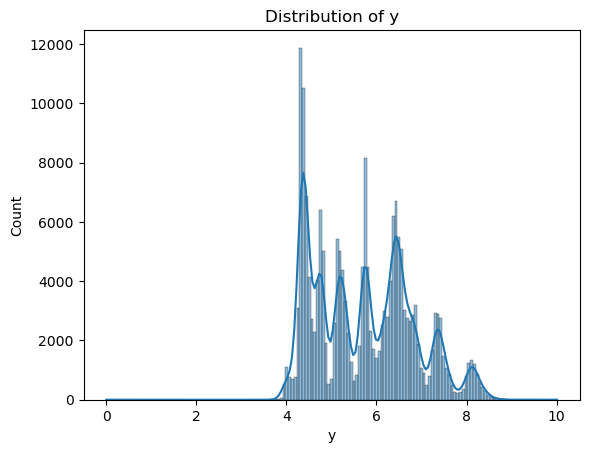

####################


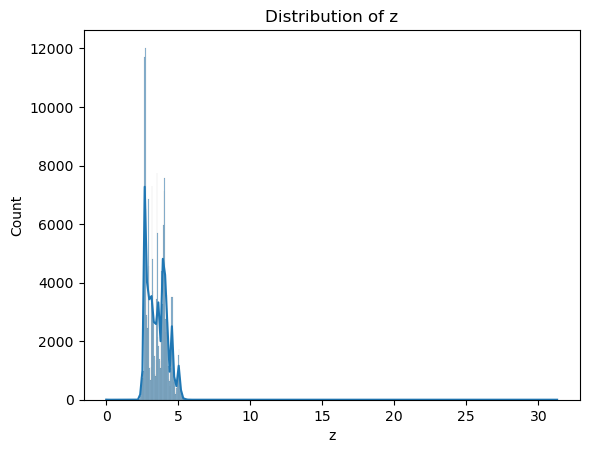

####################


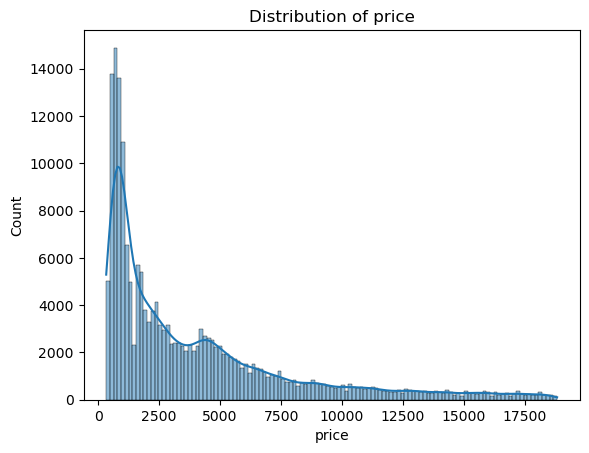

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 6))
for i, col in enumerate(num_columns):
    sns.histplot(data=data,x=col, kde=True)
    plt.title(f"Distribution of {col}")
    print(20*"#")
    plt.show()



<Axes: >

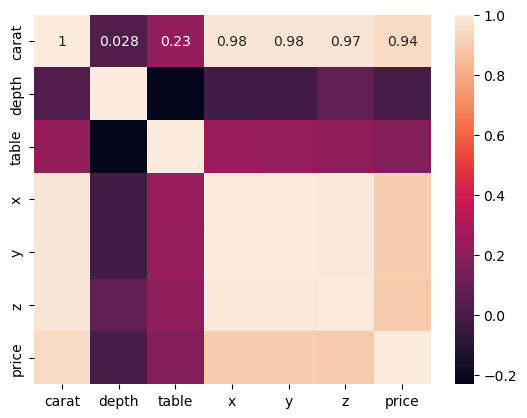

In [39]:
sns.heatmap(data[num_columns].corr(), annot=True)

In [40]:
data[num_columns].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


In [64]:
# ordinal encoding in cat_columns
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}
clarity_map = {
    'I1': 1,
    'SI2': 2,
    'SI1': 3,
    'VS2': 4,
    'VS1': 5,
    'VVS2': 6,
    'VVS1': 7,
    'IF': 8
}
color_map =  {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [65]:
data['cut'] = data['cut'].map(cut_map)
data['clarity'] = data['clarity'].map(clarity_map)
data['color'] = data['color'].map(color_map)

In [66]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [67]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [72]:
import pandas as pd
import numpy as np
data = pd.read_csv("./data/train.csv")
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [73]:
X = data.drop(labels=['id','price'], axis=1)
y = data['price']

In [75]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [76]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [79]:
cat_columns = X.select_dtypes(include='object').columns
num_columns = X.select_dtypes(exclude='object').columns

In [80]:
cat_columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [81]:
num_columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [ ]:
num_pipeline = Pipeline()

In [ ]:
cat_pipeline = Pipeline()